<a href="https://colab.research.google.com/github/beniciowg/data-science-projects/blob/master/An_Outlook_of_COVID_19_in_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Outlook of COVID-19 in Brazil

<p align="center"><img alt="Coliseu" width="100%" src="https://docs.google.com/uc?export=download&id=10avwci_jpWvr9wlD04p7Smaj49wRS138"></p>

COVID-19 is a new infectious disease caused by the recently discovered coronavirus. It took us by surprise and forced us to quarantine all around the world. We get contamined when its particles infiltrate our body through our nose, mouth and even our eyes.

As far as we know, circa of 80% of the confirmed cases present light symptoms or no symptoms at all and don't need treatment. For the 20% remaining, 15% have severe lung infection and need oxygen and the other 5% have very severe lung infection and need respirator assistance.

Researchers have been trying to find an effective treatment and a vaccine to stop the great spread of the virus, but this task is not easy due to our still little knowledge about it.

In this notebook, we will show the countries with most cases and deaths, how the number of cases and deaths evolved since the beggining of the pandemy in the world and lastly, focus the analysis on Brazil and compare it to the rest of South America.

The goal of this notebook is to bring greater clarity to the situation of the pandemy in Brazil with the available public data.


In [1]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Acquisition

[Our World in Data](https://ourworldindata.org/) is a initiative that has the goal to use research and data to make progress against the world's largest problems. They say the media focus on what's new, while their focus lies in whether its important.

We are going to use the [COVID-19 data available in Our World in Data's website](https://github.com/owid/covid-19-data/tree/master/public/data) to make the analysis in this notebook. The numbers of confirmed cases and deaths are from the European Centre for Disease Prevention and Control (ECDC). It is important to say that due to the complex chain that exists between a new case/death and its inclusion in statistics, the real numbers differ from the ones we have available.

Testing and other variables are gathered by Our World in Data from multiple other sources like WHO, United Nations, World Bank and the countries' official data.

It is important to say that in Brazil we have some conflicts between the data provided by the federal government, the state governments and unofficial databases. Our World in Data database was chosen because of its reliability and confidence.









### Variables' Dictionary
To have a better understanding of our data, below is the definition of every variable in our dataset:

* `iso_code`: ISO 3166-1 alpha-3 – three-letter country codes
* `continent`: Continent of the geographical location
* `location`: Geographical location
* `date`: IDate of observation
* `total_cases`: Total confirmed cases of COVID-19
* `new_cases`: New confirmed cases of COVID-19
* `total_deaths`: Total deaths attributed to COVID-19
* `new_deaths`: New deaths attributed to COVID-19
* `total_cases_per_million`: Total confirmed cases of COVID-19 per 1,000,000 people
* `new_cases_per_million`: New confirmed cases of COVID-19 per 1,000,000 people
* `total_deaths_per_million`: Total deaths attributed to COVID-19 per 1,000,000 people
* `new_deaths_per_million`: New deaths attributed to COVID-19 per 1,000,000 people
* `total_tests`: Total tests for COVID-19
* `new_tests`: New tests for COVID-19
* `new_tests_smoothed`: New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
* `total_tests_per_thousand`:	Total tests for COVID-19 per 1,000 people
* `new_tests_per_thousand`: New tests for COVID-19 per 1,000 people
* `new_tests_smoothed_per_thousand`: New tests for COVID-19 (7-day smoothed) per 1,000 peoples
* `tests_units`: Units used by the location to report its testing data
* `stringency_index`:	Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)
* `population`:	Population in 2020
* `population_density`:	Number of people divided by land area, measured in square kilometers, most recent year available
* `median_age`: Median age of the population, UN projection for 2020
* `aged_65_older`: Share of the population that is 65 years and older, most recent year available
* `aged_70_older`: 	Share of the population that is 70 years and older in 2015
* `gdp_per_capita`:	Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available
* `extreme_poverty`: Share of the population living in extreme poverty, most recent year available since 2010
* `cvd_death_rate`:	Death rate from cardiovascular disease in 2017
* `diabetes_prevalence`: Diabetes prevalence (% of population aged 20 to 79) in 2017
* `female_smokers`: Share of women who smoke, most recent year available
* `male_smokers`: Share of men who smoke, most recent year available
* `handwashing_facilities`:	Share of the population with basic handwashing facilities on premises, most recent year available
* `hospital_beds_per_thousand`: Hospital beds per 1,000 people, most recent year available since 2010
* `life_expectancy`: Life expectancy at birth in 2019

### Importing COVID-19's Data

We are going to import the CSV file made available by Our World in Data using Pandas as usual.

In [2]:
# importing the packages we are going to use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# setting the seaborn style for plots as default
sns.set()

# importing the COVID-19 dataset as a Pandas Dataframe
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exploratory Analysis

First of all, we will understand our dataset better checking its first lines, its dimensions and whether it has null values or not.


In [3]:
# first 5 lines
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [4]:
# printing the dataset's dimensions
print('Dataset dimensions:\n', 
      f'Entries: {df.shape[0]}\n', 
      f'Variables: {df.shape[1]}')

Dataset dimensions:
 Entries: 26329
 Variables: 34


In [5]:
# info do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26329 entries, 0 to 26328
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         26265 non-null  object 
 1   continent                        26086 non-null  object 
 2   location                         26329 non-null  object 
 3   date                             26329 non-null  object 
 4   total_cases                      26114 non-null  float64
 5   new_cases                        26114 non-null  float64
 6   total_deaths                     26114 non-null  float64
 7   new_deaths                       26114 non-null  float64
 8   total_cases_per_million          26050 non-null  float64
 9   new_cases_per_million            26050 non-null  float64
 10  total_deaths_per_million         26050 non-null  float64
 11  new_deaths_per_million           26050 non-null  float64
 12  total_tests       

We can see that our dataset has an entry for each country on each day. As we have some countries where the disease started its spreading later, they have values as 0 until the first day with confirmed cases. Besides that, some variables related to demographic, public health and economics started to be inputed later, so their first values are null types.

We can also see that the date column has an object type, so we are going to change its type to datetime.

In [6]:
# alterando the column's type to datetime
df['date'] = pd.to_datetime(df['date'])

# checking if the alteration was sucessful
df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


When we used the `info()` method we could see that a lot of columns have null values, so we are going to check the percentage that these values represent.

In [7]:
# porcentagem de valores nulos
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests                          0.740932
new_tests_per_thousand             0.740932
total_tests_per_thousand           0.715409
total_tests                        0.715409
new_tests_smoothed_per_thousand    0.692430
new_tests_smoothed                 0.692430
tests_units                        0.668882
handwashing_facilities             0.592920
extreme_poverty                    0.402826
male_smokers                       0.282768
female_smokers                     0.274412
stringency_index                   0.194386
hospital_beds_per_thousand         0.172471
aged_65_older                      0.109043
gdp_per_capita                     0.106461
aged_70_older                      0.100915
median_age                         0.096282
cvd_death_rate                     0.095142
diabetes_prevalence                0.065897
population_density                 0.043412
life_expectancy                    0.013863
new_deaths_per_million             0.010597
total_deaths_per_million        

The only columns that don't have null values are `date` and `location`. Since the null values in the columns `total_cases`, `total_deaths`, `total_cases_per_million` and `total_deaths_per_million` are related to the periods that some countries didn't have confirmed cases or deaths, we are going to substitute them by 0.

In [8]:
# subtituting the null values by 0 for cases and deaths
df.total_cases.fillna(value=0, inplace=True)
df.total_deaths.fillna(value=0, inplace=True)
df.total_cases_per_million.fillna(value=0, inplace=True)
df.total_deaths_per_million.fillna(value=0, inplace=True)


Now we will attribute the last date of the dataset to a variable and use it to check the countries with most cases and deaths and keep our analysis always updated.

In [9]:
# attributing the last date to a variable
last_date = df.date.max()

df.loc[df.date == last_date, ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:5]

,location,total_cases
26264,World,9581803.0
25060,United States,2422310.0
3572,Brazil,1228114.0
19888,Russia,613994.0
11123,India,490401.0


We can see that we have a line regarding the data for the whole world. As we are going to use this line later we won't delete it, but change our filter instead so it doesn't appear in our list.

To have a better visualization of our data, we are going to make boxplots to check the countries with most cases and deaths.

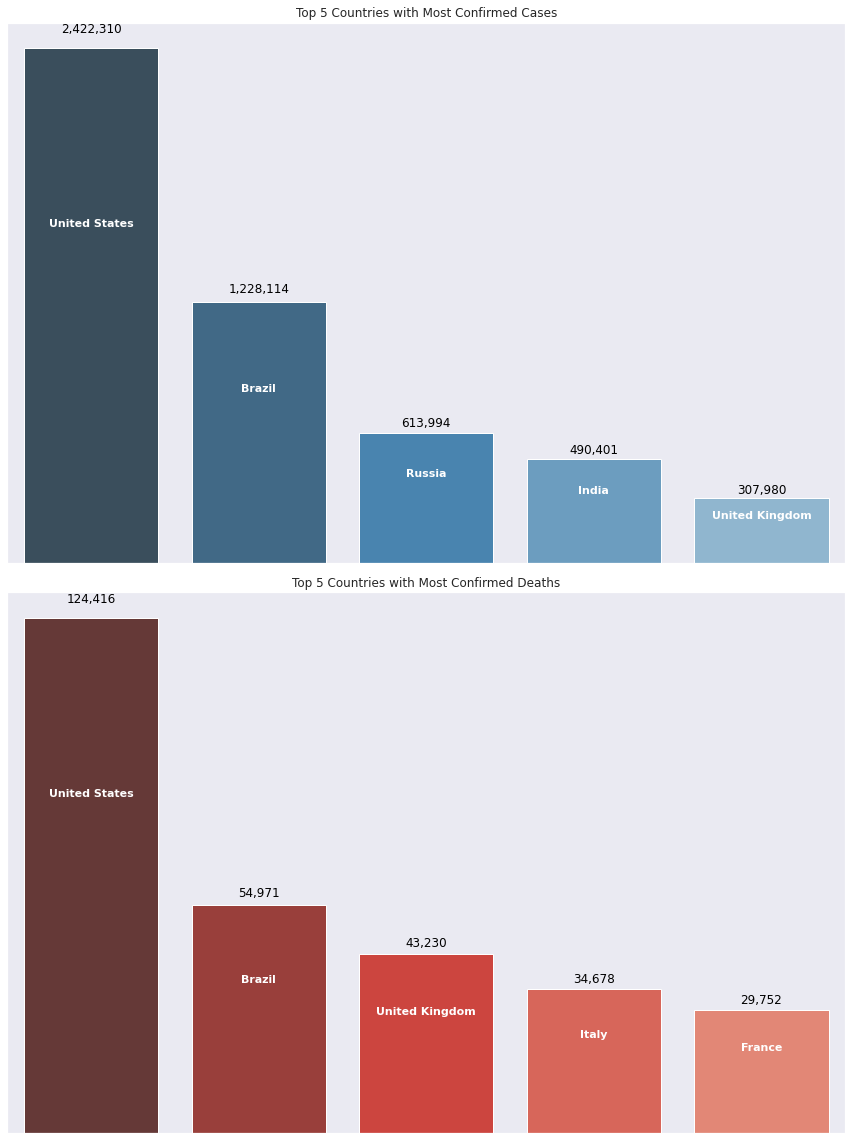

In [23]:
# attributing our table of the top 5 countries with most cases to a variable
top5_cases = df.loc[df.date == last_date, ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:6]

# creating the figure that will contain our two plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,16))

# plot of total cases
g = sns.barplot(data=top5_cases, x='location', y='total_cases', 
                palette='Blues_d', ax=ax1)
ax1.set_title('Top 5 Countries with Most Confirmed Cases')
ax1.grid(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

for p in g.patches:
        g.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, 1.025*p.get_height()),
                    ha='center', va='bottom', color='black')

for p, q in zip(g.patches, top5_cases.location):
        g.annotate(f'{q}', (p.get_x()+0.4, 0.65*p.get_height()),
                    ha='center', va='bottom', color='w', 
                   fontsize=11, fontweight='bold')

# attributing our table of the top 5 countries with most deaths to a variable
top5_deaths = df.loc[df.date == last_date, ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

# plot of total deaths
g2 = sns.barplot(data=top5_deaths, x='location', y='total_deaths', 
                palette='Reds_d', ax=ax2)
ax2.set_title('Top 5 Countries with Most Confirmed Deaths')
ax2.grid(False)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

for p in g2.patches:
        g2.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, 1.025*p.get_height()),
                    ha='center', va='bottom', color='black')

for p, q in zip(g2.patches, top5_deaths.location):
        g2.annotate(f'{q}', (p.get_x()+0.4, 0.65*p.get_height()),
                    ha='center', va='bottom', color='w', 
                   fontsize=11, fontweight='bold')


plt.tight_layout()

On the date of this analysis (26/06/2020) the top 5 countries with most cases are United States, Brazil, Russia, India and United Kingdom. United States and Brazil figure also as the two countries with most deaths. 

United Kingdom that appeared as the fifth country with most cases, is in the third position regarding deaths with Italy and France completing the list.

Now, let's check the countries most cases and deaths per million people.



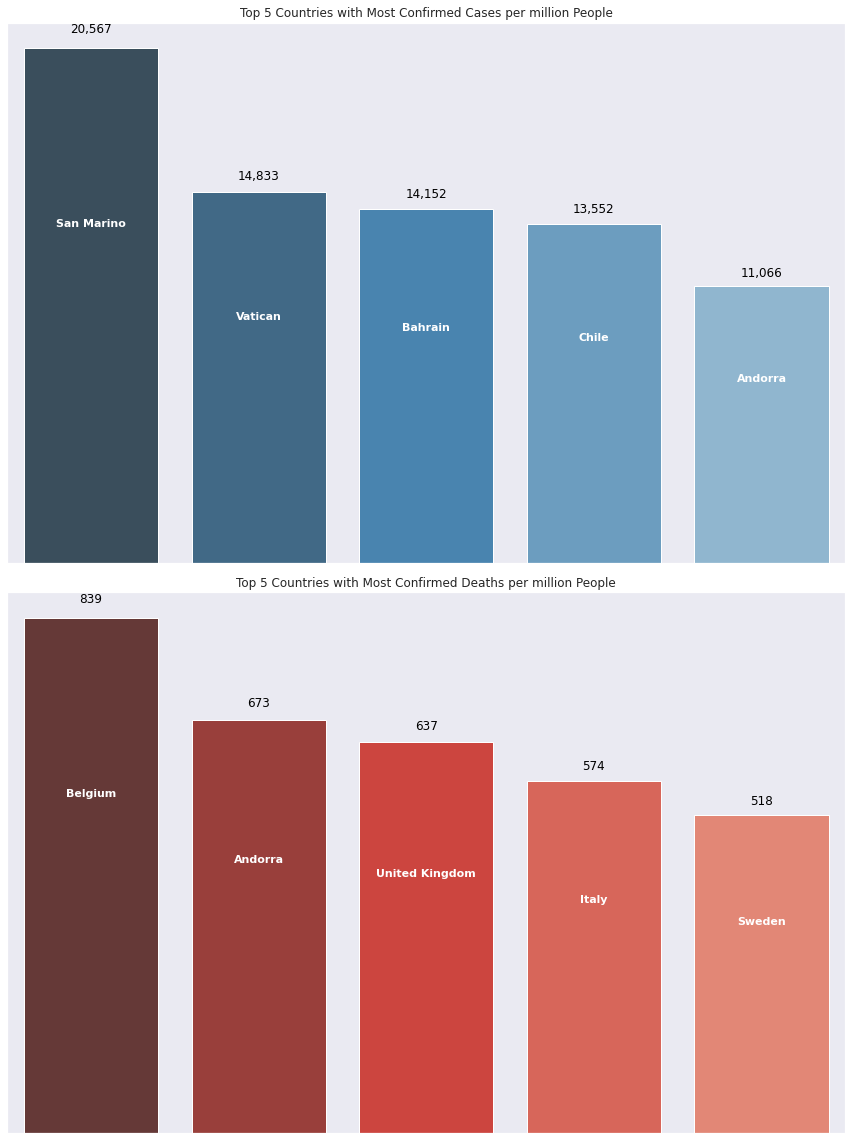

In [24]:
# creating the figure that will contain our two plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,16))

# attributing our table of the top 5 countries with most cases per million people to a variable
top5_cases_per_million = df.loc[df.date == last_date, ['location', 'total_cases_per_million']
                                ].sort_values(by="total_cases_per_million", ascending=False)[1:6]

# plot of total cases per million people
g = sns.barplot(data=top5_cases_per_million, x='location', y='total_cases_per_million', 
                palette='Blues_d', ax=ax1)
ax1.set_title('Top 5 Countries with Most Confirmed Cases per million People')
ax1.grid(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

for p in g.patches:
        g.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, 1.025*p.get_height()),
                    ha='center', va='bottom', color='black')

for p, q in zip(g.patches, top5_cases_per_million.location):
        g.annotate(f'{q}', (p.get_x()+0.4, 0.65*p.get_height()),
                    ha='center', va='bottom', color='w', 
                    fontsize=11, fontweight='bold')

# attributing our table of the top 5 countries with most deaths per million people to a variable
top5_deaths_per_million = df.loc[df.date == last_date, ['location', 'total_deaths_per_million']
                                ].sort_values(by="total_deaths_per_million", ascending=False)[1:6]

# plot of total deaths per million people
g2 = sns.barplot(data=top5_deaths_per_million, x='location', y='total_deaths_per_million', 
                palette='Reds_d', ax=ax2)
ax2.set_title('Top 5 Countries with Most Confirmed Deaths per million People')
ax2.grid(False)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

for p in g2.patches:
        g2.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, 1.025*p.get_height()),
                    ha='center', va='bottom', color='black')

for p, q in zip(g2.patches, top5_deaths_per_million.location):
        g2.annotate(f'{q}', (p.get_x()+0.4, 0.65*p.get_height()),
                    ha='center', va='bottom', color='w', 
                    fontsize=11, fontweight='bold')

plt.tight_layout()

On the date of this analysis (26/06/2020) the top 5 countries with most cases per million people are San Marino, Vatican, Bahrain, Chile and Andorra. From these countries, only Andorra appears also in the list of most deaths per million people, on the second position.

Belgium is the country with most deaths per million people. United Kingdom, Italy and Sweden complete the list after Andorra.

It is important to clarify that due to the lack of tests, a lot of countries have subnotification for both cases and deaths, so these numbers may change with time.

### World's Cases and Deaths evolution

We verified some important statistics about coronavirus regarding the countries that are in the most delicate situations. Now, we are going to see how the numbers of cases and deaths evolved through time in the entire world.

In [12]:
# attributing the world data to a variable
world_data = df[df.location == 'World']

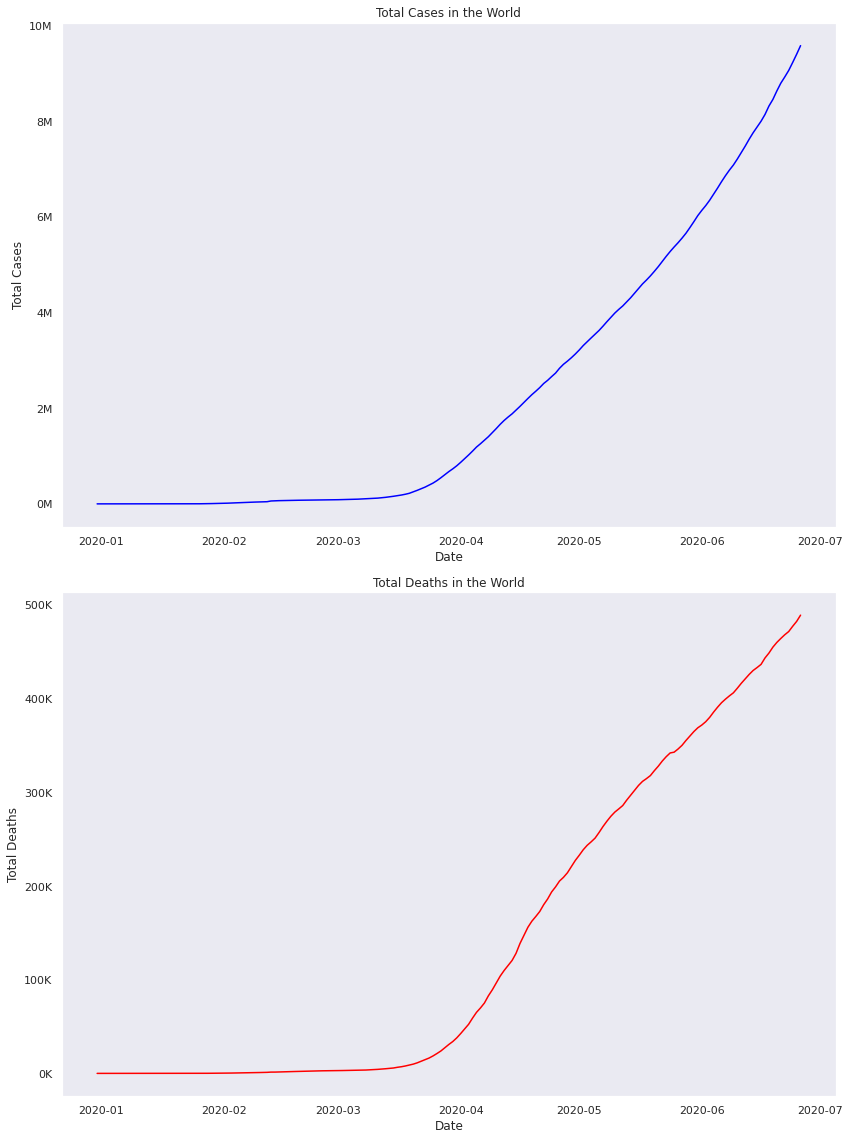

In [25]:
# importing the package that allows us to format our axis
import matplotlib.ticker as ticker

# creating the figure that will contain our plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,16))

# plot for total cases in the world
g1 = ax1.plot(world_data['date'], world_data['total_cases'],
                  color='blue', label='Total Cases',)
ax1.grid(False)
ax1.set_title('Total Cases in the World')
ax1.set_ylabel('Total Cases')
ax1.ticklabel_format(axis='y', style='plain')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000) + 'M'))
ax1.set_xlabel('Date')

# plot for total deaths in the world
g2 = ax2.plot(world_data['date'], world_data['total_deaths'],
                  color='red', label='Total Deaths')
ax2.set_title('Total Deaths in the World')
ax2.grid(False)
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))

plt.tight_layout()

It is possible to see a great change of the curves' inclination starting in the month of march, where the numbers of cases and deaths start increasing exponentially.

### Exploratory Analysis for Brazil

Now that we have seen how is the situation of the coronavirus pandemy around the world, let's see how it has evolved in Brazil and compare it to the other countries in South America.

In [14]:
# making a copy of the dataset with only brazil's data and attributing to a variable
df_brazil = df.loc[df.location == 'Brazil'].copy()

df_brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3394,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3395,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3396,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3397,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3398,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [15]:
# checking the date of the first case
df_brazil[df_brazil.new_cases != 0].date.head(1)

3451   2020-02-26
Name: date, dtype: datetime64[ns]

The first confirmed case of COVID-19 in Brazil was in 26/02/2020.

In [16]:
# checking the date of the first case
df_brazil[df_brazil.new_deaths != 0].date.head(1)

3472   2020-03-18
Name: date, dtype: datetime64[ns]

The first death attributed to COVID-19 in Brazil was in 18/03/2020.

In [17]:
# importing a necessary package
from datetime import date

# calculating the diference between the first case and the first death
delta = df_brazil.date.loc[3445] - df_brazil.date.loc[3424]

print(f'It was {delta.days} days from the first confirmed case until the first confirmed death in Brazil.')

It was 21 days from the first confirmed case until the first confirmed death in Brazil.


We are going to make lineplots to see how the disease has been evolving in Brazil.

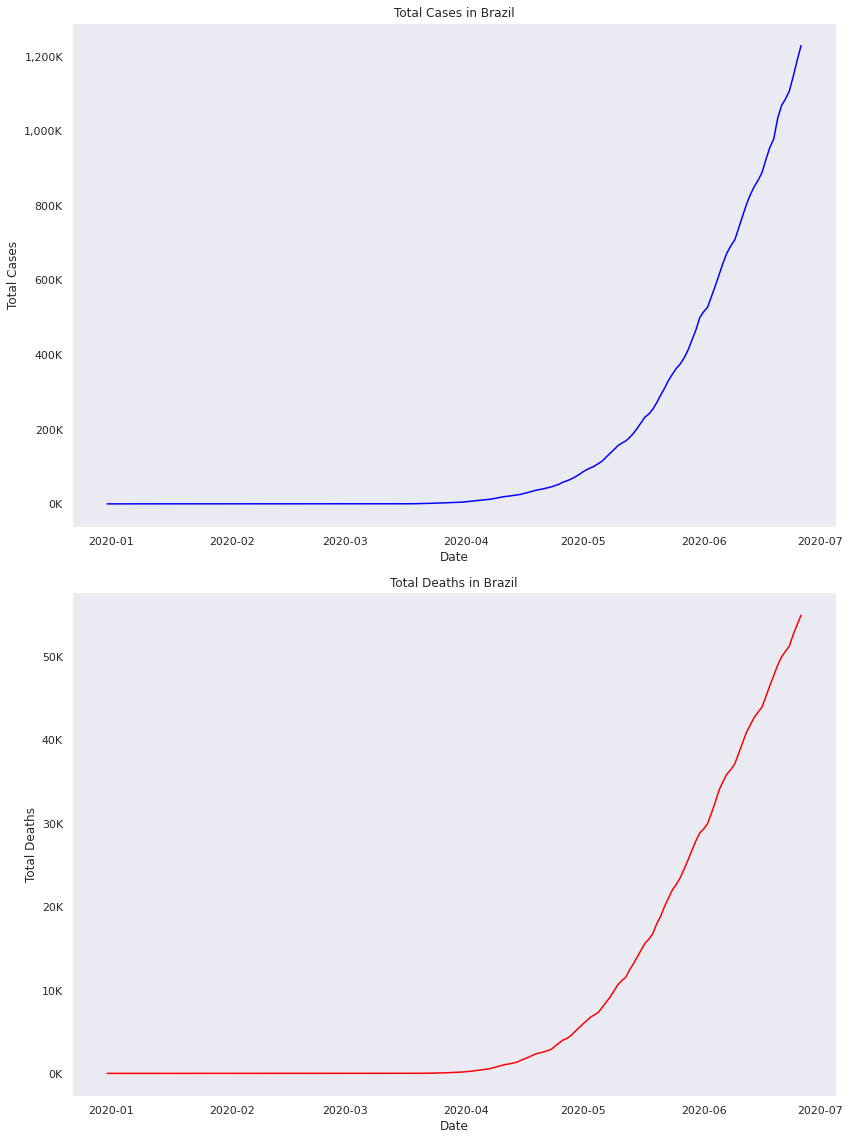

In [26]:
# creating the figure that will contain our plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,16))

# plot for total cases in Brazil
ax1.plot(df_brazil['date'], df_brazil['total_cases'],
                  color='blue', label='Total Cases',)
ax1.grid(False)
ax1.set_title('Total Cases in Brazil')
ax1.set_ylabel('Total Cases')
ax1.ticklabel_format(axis='y', style='plain')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax1.set_xlabel('Date')

# plot for total deaths in Brazil
ax2.plot(df_brazil['date'], df_brazil['total_deaths'],
                  color='red', label='Total Deaths')
ax2.set_title('Total Deaths in Brazil')
ax2.grid(False)
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))

plt.tight_layout()

It is possible to verify that in the month of April, the curve had a great change in its inclination and the cases and deaths started growing exponentially.

Let's compare Brazil's numbers with the rest of South America now.

In [19]:
# attributing South America's data to a variable
df_sa = df[df.continent == 'South America']

# checking the first 5 rows
df_sa.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
846,ARG,South America,Argentina,2020-03-04,1.0,1.0,0.0,0.0,0.022,0.022,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67
847,ARG,South America,Argentina,2020-03-06,2.0,1.0,0.0,0.0,0.044,0.022,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67
848,ARG,South America,Argentina,2020-03-07,8.0,6.0,0.0,0.0,0.177,0.133,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67
849,ARG,South America,Argentina,2020-03-08,9.0,1.0,1.0,1.0,0.199,0.022,0.022,0.022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67
850,ARG,South America,Argentina,2020-03-09,12.0,3.0,1.0,0.0,0.266,0.066,0.022,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67


As we have dealt with null data in our entire dataset, there is no need to make additional treatments in the specific data for South America

Now, we will check the plots for all the countries in the continent.

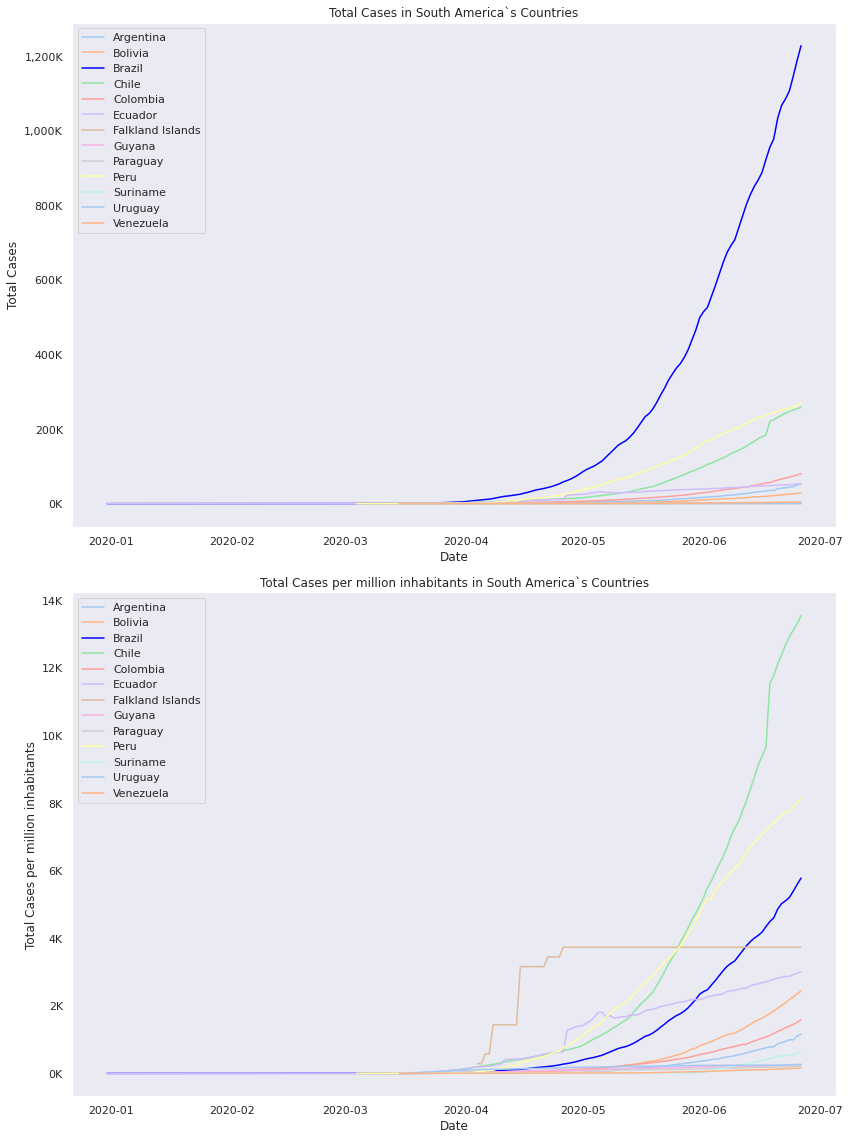

In [27]:
# creating the figure that will contain our plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,16))

sns.set_palette('pastel')

# plotting for total cases in South America
for country in df_sa.location.unique():
  df_plot = df_sa[df_sa.location == country]
  if country == 'Brazil':
    ax1.plot(df_plot['date'], df_plot['total_cases'], color='blue')
  else:
    ax1.plot(df_plot['date'], df_plot['total_cases'])

ax1.legend(df_sa.location.unique())
ax1.grid(False)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax1.set_title('Total Cases in South America`s Countries')
ax1.set_ylabel('Total Cases')
ax1.set_xlabel('Date')

# plotting for total cases per million inhabitants in South America
for country in df_sa.location.unique():
  df_plot = df_sa[df_sa.location == country]
  if country == 'Brazil':
    ax2.plot(df_plot['date'], df_plot['total_cases_per_million'], color='blue')
  else:
    ax2.plot(df_plot['date'], df_plot['total_cases_per_million'])

ax2.legend(df_sa.location.unique())
ax2.grid(False)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax2.set_title('Total Cases per million inhabitants in South America`s Countries')
ax2.set_ylabel('Total Cases per million inhabitants')
ax2.set_xlabel('Date')

plt.tight_layout()

On the date of this analysis (26/06/2020), we can see that Brazil leads the number of cases. However, checking the plot of the number of cases per million people, we verify that Chile and Peru have greater numbers than Brazil. The curves for Falkland Islands and Ecuador decreases in some intervals, which doesn't make sense, but it is probably due to changes in the methods of presenting the data like attributing a case to the date the exam was made instead of the date that the result came out.

Now, let's see the plot for deaths and deaths per million people.

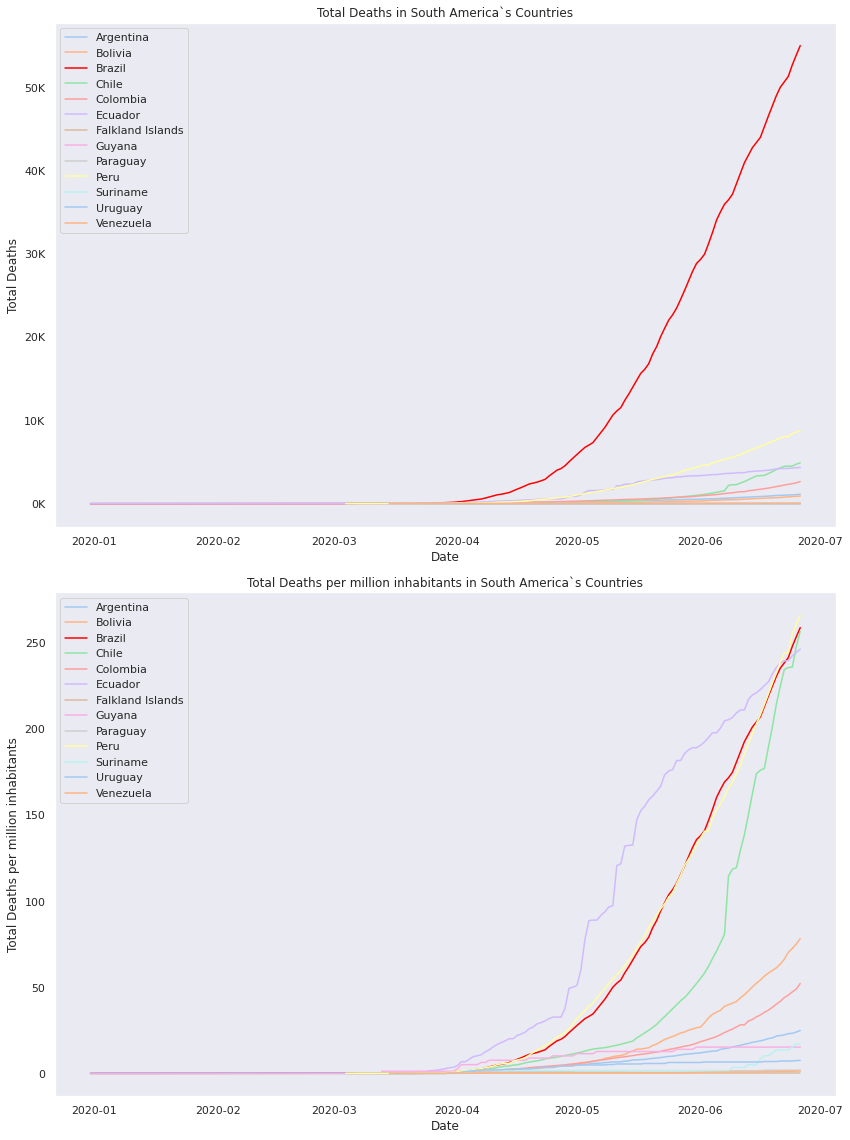

In [28]:
# creating the figure that will contain our plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,16))

sns.set_palette('pastel')

# plotting for total deaths in South America
for country in df_sa.location.unique():
  df_plot = df_sa[df_sa.location == country]
  if country == 'Brazil':
    ax1.plot(df_plot['date'], df_plot['total_deaths'], color='red')
  else:
    ax1.plot(df_plot['date'], df_plot['total_deaths'])

ax1.legend(df_sa.location.unique())
ax1.grid(False)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax1.set_title('Total Deaths in South America`s Countries')
ax1.set_ylabel('Total Deaths')
ax1.set_xlabel('Date')

# plotting for total cases per million inhabitants in South America
for country in df_sa.location.unique():
  df_plot = df_sa[df_sa.location == country]
  if country == 'Brazil':
    ax2.plot(df_plot['date'], df_plot['total_deaths_per_million'], color='red')
  else:
    ax2.plot(df_plot['date'], df_plot['total_deaths_per_million'])

ax2.legend(df_sa.location.unique())
ax2.grid(False)
ax2.set_title('Total Deaths per million inhabitants in South America`s Countries')
ax2.set_ylabel('Total Deaths per million inhabitants')
ax2.set_xlabel('Date')

plt.tight_layout()

On the date of this analysis (26/06/2020), as expected Brazil leads also the number of deaths and its curve regarding the number of deaths per million people is similar to Peru. Ecuador led the curve of number of deaths per million people until June, but Brazil, Chile and Peru surpassed it recently.

Again, it is important to say that we probably still have a lot of subnotification, which can imply in great changes of these numbers.

## Conclusion

The commentaries made about the numbers are for the day that this analysis was made (26/06/2020), so they are going to change with time.

United States has the most delicate situation regarding the number of cases and deaths in the world. Brazil comes in second place with the numbers increasing exponentially.

This notebook focused in analyzing cases and deaths and focus on Brazil, but there are plenty of other informations that can be extracted from this dataset.

We must always remember that despite we are looking at numbers, they represent real lives that were lost. So, if you can, stay home!